# Scikit learn cheat sheet

Cheat sheet to scikit learn. Includes

<ul style="list-style-type:circle">
  <li>xxx</li>
  <li>xxx</li>
</ul>
 

Used data sets are
 - Classification: Iris data set

Sources:
 - Lecture slides, Uni Michgigan Applied Data Science with Python
 - Stack Overflow

ver 0.01, in process... 

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"><li><span><a href="#Data-sets-and-imports" data-toc-modified-id="Data-sets-and-imports-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data sets and imports</a></span></li><li><span><a href="#Classification" data-toc-modified-id="Classification-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Classification</a></span><ul class="toc-item"><li><span><a href="#Plotters-for-classification" data-toc-modified-id="Plotters-for-classification-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Plotters for classification</a></span></li><li><span><a href="#Visualize-iris-data-set" data-toc-modified-id="Visualize-iris-data-set-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Visualize iris data set</a></span></li><li><span><a href="#Data-pre-processing" data-toc-modified-id="Data-pre-processing-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Data pre-processing</a></span><ul class="toc-item"><li><span><a href="#Scikit-learn-bunch-object-into-pandas-data-frame" data-toc-modified-id="Scikit-learn-bunch-object-into-pandas-data-frame-2.3.1"><span class="toc-item-num">2.3.1&nbsp;&nbsp;</span>Scikit learn bunch object into pandas data frame</a></span></li><li><span><a href="#Splitting-data-into-train,-and-test-tests" data-toc-modified-id="Splitting-data-into-train,-and-test-tests-2.3.2"><span class="toc-item-num">2.3.2&nbsp;&nbsp;</span>Splitting data into train, and test tests</a></span></li><li><span><a href="#Creating-data-sets" data-toc-modified-id="Creating-data-sets-2.3.3"><span class="toc-item-num">2.3.3&nbsp;&nbsp;</span>Creating data sets</a></span></li><li><span><a href="#Feature-scaling-and-normalization" data-toc-modified-id="Feature-scaling-and-normalization-2.3.4"><span class="toc-item-num">2.3.4&nbsp;&nbsp;</span>Feature scaling and normalization</a></span><ul class="toc-item"><li><span><a href="#Z-score-standardization" data-toc-modified-id="Z-score-standardization-2.3.4.1"><span class="toc-item-num">2.3.4.1&nbsp;&nbsp;</span>Z-score standardization</a></span></li><li><span><a href="#MinMax-scaling" data-toc-modified-id="MinMax-scaling-2.3.4.2"><span class="toc-item-num">2.3.4.2&nbsp;&nbsp;</span>MinMax scaling</a></span></li></ul></li></ul></li><li><span><a href="#Models" data-toc-modified-id="Models-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Models</a></span><ul class="toc-item"><li><span><a href="#Logistic-regression" data-toc-modified-id="Logistic-regression-2.4.1"><span class="toc-item-num">2.4.1&nbsp;&nbsp;</span>Logistic regression</a></span></li><li><span><a href="#K-nearest-neighbours" data-toc-modified-id="K-nearest-neighbours-2.4.2"><span class="toc-item-num">2.4.2&nbsp;&nbsp;</span>K-nearest neighbours</a></span></li><li><span><a href="#Decision-tree" data-toc-modified-id="Decision-tree-2.4.3"><span class="toc-item-num">2.4.3&nbsp;&nbsp;</span>Decision tree</a></span></li><li><span><a href="#Support-vector-classifier" data-toc-modified-id="Support-vector-classifier-2.4.4"><span class="toc-item-num">2.4.4&nbsp;&nbsp;</span>Support vector classifier</a></span></li><li><span><a href="#Naive-Bayes-Classifier" data-toc-modified-id="Naive-Bayes-Classifier-2.4.5"><span class="toc-item-num">2.4.5&nbsp;&nbsp;</span>Naive Bayes Classifier</a></span></li><li><span><a href="#Random-forests" data-toc-modified-id="Random-forests-2.4.6"><span class="toc-item-num">2.4.6&nbsp;&nbsp;</span>Random forests</a></span></li><li><span><a href="#Gradient-boosted-decision-trees" data-toc-modified-id="Gradient-boosted-decision-trees-2.4.7"><span class="toc-item-num">2.4.7&nbsp;&nbsp;</span>Gradient boosted decision trees</a></span></li><li><span><a href="#Simple-neural-network-(MLP)" data-toc-modified-id="Simple-neural-network-(MLP)-2.4.8"><span class="toc-item-num">2.4.8&nbsp;&nbsp;</span>Simple neural network (MLP)</a></span></li></ul></li><li><span><a href="#Model-evaluation" data-toc-modified-id="Model-evaluation-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Model evaluation</a></span><ul class="toc-item"><li><span><a href="#Select-binary-classifier-to-be-used-in-this-section" data-toc-modified-id="Select-binary-classifier-to-be-used-in-this-section-2.5.1"><span class="toc-item-num">2.5.1&nbsp;&nbsp;</span>Select binary classifier to be used in this section</a></span></li><li><span><a href="#Evaluation-curves" data-toc-modified-id="Evaluation-curves-2.5.2"><span class="toc-item-num">2.5.2&nbsp;&nbsp;</span>Evaluation curves</a></span><ul class="toc-item"><li><span><a href="#Precision-recall-curve" data-toc-modified-id="Precision-recall-curve-2.5.2.1"><span class="toc-item-num">2.5.2.1&nbsp;&nbsp;</span>Precision-recall curve</a></span></li><li><span><a href="#ROC-curve" data-toc-modified-id="ROC-curve-2.5.2.2"><span class="toc-item-num">2.5.2.2&nbsp;&nbsp;</span>ROC curve</a></span></li></ul></li><li><span><a href="#Dummy-classifiers" data-toc-modified-id="Dummy-classifiers-2.5.3"><span class="toc-item-num">2.5.3&nbsp;&nbsp;</span>Dummy classifiers</a></span></li><li><span><a href="#Cross-validation" data-toc-modified-id="Cross-validation-2.5.4"><span class="toc-item-num">2.5.4&nbsp;&nbsp;</span>Cross-validation</a></span></li><li><span><a href="#Hyperparameter-tuning" data-toc-modified-id="Hyperparameter-tuning-2.5.5"><span class="toc-item-num">2.5.5&nbsp;&nbsp;</span>Hyperparameter tuning</a></span><ul class="toc-item"><li><span><a href="#Grid-search" data-toc-modified-id="Grid-search-2.5.5.1"><span class="toc-item-num">2.5.5.1&nbsp;&nbsp;</span>Grid search</a></span></li><li><span><a href="#Validation-curve" data-toc-modified-id="Validation-curve-2.5.5.2"><span class="toc-item-num">2.5.5.2&nbsp;&nbsp;</span>Validation curve</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Regression" data-toc-modified-id="Regression-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Regression</a></span><ul class="toc-item"><li><span><a href="#Linear-regression" data-toc-modified-id="Linear-regression-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Linear regression</a></span></li></ul></li><li><span><a href="#Stuff-to-add" data-toc-modified-id="Stuff-to-add-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Stuff to add</a></span></li></ul></div>

## Data sets and imports

In [1]:
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from IPython.display import display_html
from IPython.display import display
%matplotlib notebook

def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    html_str = html_str.replace('table','table style="display:inline; border:0px"')          
    display_html(html_str,raw=True)

iris = datasets.load_iris()

## Classification

### Plotters for classification

In [55]:
def plot_decision_boundaries(X, y, model, title = None):
    '''
    Takes as inputs 
        X_test (two features)
        y_test
        fitted model
        
    To do: Needs to be made dynamice w.r.t to target classes
    '''
    no_targets = len(y.unique())
    
    mesh_step_size = 0.01
    x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
    y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, mesh_step_size), np.arange(y_min, y_max, mesh_step_size))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Colors    
    import matplotlib.colors as mcolors
    colors = sns.color_palette("husl", no_targets)
    cmap = mcolors.LinearSegmentedColormap.from_list("Custom", colors, len(colors))
    

    # Figure
    fig = plt.figure(figsize = (6,4), dpi = 100)
    ax = fig.add_subplot(111)
    scats = []
    for i in range(no_targets):
        ax.scatter(X[y.values == i,0], X[y.values == i,1], alpha = 0.8, label = i, color = colors[i], s = 10)
    plt.imshow(Z, interpolation = 'nearest', cmap = cmap, alpha = 0.15,
               extent=(x_min, x_max, y_min, y_max), origin = 'lower')
    ax.legend()
    #ax.set_aspect('equal')
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)    
    if title:
        ax.set_title(title)
    

In [51]:
def plot_bin_decision_probs(X, y, model, title = None):
    '''
    Takes as inputs 
        X_test (two features)
        y_test
        fitted model
    '''
    no_targets = len(y.unique())
    
    mesh_step_size = 0.01
    x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
    y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, mesh_step_size), np.arange(y_min, y_max, mesh_step_size))
    Z = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,1]
    Z = Z.reshape(xx.shape)
    
    # Colors    
    #import matplotlib.colors as mcolors
    #colors = sns.color_palette("husl", no_targets)
    #cmap = mcolors.LinearSegmentedColormap.from_list("Custom", colors, 50)

    # Figure
    fig = plt.figure(figsize = (6,4))
    ax = fig.add_subplot(111)
    scats = []

    ax.scatter(X[y.values == 0,0], X[y.values == 0,1], alpha = 0.8, label = '0', color = 'blue', s = 10)
    ax.scatter(X[y.values == 1,0], X[y.values == 1,1], alpha = 0.8, label = '1', color = 'red', s = 10)

    plt.imshow(Z, interpolation = 'nearest', cmap = 'RdYlBu_r', alpha = 0.15,
               extent=(x_min, x_max, y_min, y_max), origin = 'lower')
    ax.legend()
    ax.set_aspect('equal')
    if title:
        ax.set_title(title)
    

In [4]:
def plot_confusion_matrix(y_test, y_pred, title):
    
    labelsno = len(np.unique(y_test))
    df_cm = pd.DataFrame(confusion_matrix(y_test, y_pred), index = [i for i in range(0,labelsno)],
                  columns = [i for i in range(0,labelsno)])
    
    plt.figure(figsize = (6,4))
    sns.heatmap(df_cm, annot=True)
    plt.title(title + '\nAccuracy: {0:.3f}'.format(accuracy_score(y_test, y_pred)))
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [5]:
def plot_bin_prcurve(precision, recall):
    '''
    y_test: test sample true labels
    y_clf_score: scores from decision_function
    closest_zero: clf_score closest to zero
    '''
    closest_zero = np.argmin(np.abs(thresholds))
    closest_zero_p = precision[closest_zero]
    closest_zero_r = recall[closest_zero]
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.set_xlim([0.0, 1.01])
    ax.set_ylim([0.0, 1.01])    
    ax.plot(precision, recall)
    ax.plot(closest_zero_p, closest_zero_r, 'o', markersize = 12, fillstyle = 'none', c = 'r', mew = 3)
    ax.set_xlabel('Precision')
    ax.set_ylabel('Recall')    
    ax.set_aspect('equal')

In [1]:
def plot_bin_ROC(y_test, y_pred):
    from sklearn.metrics import roc_curve, auc
    FPR, TPR, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(FPR, TPR)
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.set_xlim([-0.01, 1.00])
    ax.set_ylim([-0.01, 1.00])    
    ax.plot(FPR, TPR, lw = 3, label='ROC curve (area = {:0.3f})'.format(roc_auc))
    ax.set_xlabel('FPR')
    ax.set_ylabel('TPR')    
    ax.set_title('ROC curve')
    ax.legend(loc = 'lower right')
    ax.plot([0, 1], [0, 1], color = 'navy', lw = 3, linestyle='--')
    ax.set_aspect('equal')

In [7]:
def plot_validation_curve(train_scores, validation_scores, param_range, param_name, scoring, title = 'Validation curve'):

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    validation_scores_mean = np.mean(validation_scores, axis=1)
    validation_scores_std = np.std(validation_scores, axis=1)    
    
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.set_title(title)
    ax.set_xlabel(param_name)
    ax.set_ylabel("Score")
    ax.set_ylim(0.0, 1.1)
    lw = 2
    plt.semilogx(param_range, train_scores_mean, label="Training score", color="darkorange", lw=lw)
    plt.fill_between( param_range, train_scores_mean - train_scores_std
                     ,train_scores_mean + train_scores_std, alpha = 0.2
                     ,color = 'darkorange', lw = lw)
    plt.semilogx(param_range, validation_scores_mean, label="Cross-validation score", color = 'navy', lw = lw)
    plt.fill_between(param_range, validation_scores_mean - validation_scores_std,
                     validation_scores_mean + validation_scores_std, alpha = 0.2,
                     color = 'navy', lw = lw)
    ax.legend(loc = 'best')

### Visualize iris data set

<IPython.core.display.Javascript object>


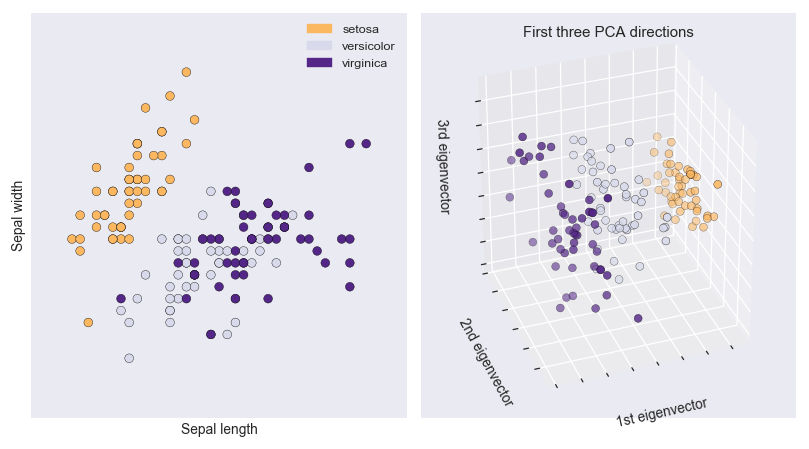

In [10]:
# http://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
import matplotlib.patches as mpatches

from matplotlib.colors import ListedColormap
import math
plt.close('all')

X = iris.data[:, :2]  # for first plot only two first features 
y = iris.target
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

# Color map
cmap = plt.cm.PuOr
colors = []
colors.append(cmap(0.3)); colors.append(cmap(0.6)); colors.append(cmap(0.9))
cmap = cmap.from_list('Custom cmap', colors, 3)

# Figure
fig = plt.figure(figsize=(9, 5))

# First axis
ax1 = fig.add_subplot(121)
ax1.scatter(X[:, 0], X[:, 1], c = y, cmap = cmap, edgecolor = 'k')
ax1.set_xlabel('Sepal length')
ax1.set_ylabel('Sepal width')
ax1.set_xlim(x_min, x_max)
ax1.set_ylim(y_min, y_max)
ax1.set_xticks(())
ax1.set_yticks(())

# legend
patch1 = mpatches.Patch(color = cmap(0), label = iris.target_names[0])
patch2 = mpatches.Patch(color = cmap(1), label = iris.target_names[1])
patch3 = mpatches.Patch(color = cmap(2), label = iris.target_names[2])
patches = [patch1, patch2, patch3]
ax1.legend(handles = patches, loc='upper right')

# To getter a better understanding of interaction of the dimensions
# plot the first three PCA dimensions
pca = PCA(n_components = 3)
pca.fit(iris.data)
X_reduced = pca.transform(iris.data)
#X_reduced = PCA(n_components=3).fit_transform(iris.data)

# Second axis
ax2 = fig.add_subplot(1, 2, 2, projection='3d')
ax2.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=y,
           cmap=cmap, edgecolor='k', s=40)
ax2.set_title("First three PCA directions")
ax2.set_xlabel("1st eigenvector")
ax2.w_xaxis.set_ticklabels([])
ax2.set_ylabel("2nd eigenvector")
ax2.w_yaxis.set_ticklabels([])
ax2.set_zlabel("3rd eigenvector")
ax2.w_zaxis.set_ticklabels([])
ax2.view_init(azim = 110, elev = -150)

fig.tight_layout()


<IPython.core.display.Javascript object>


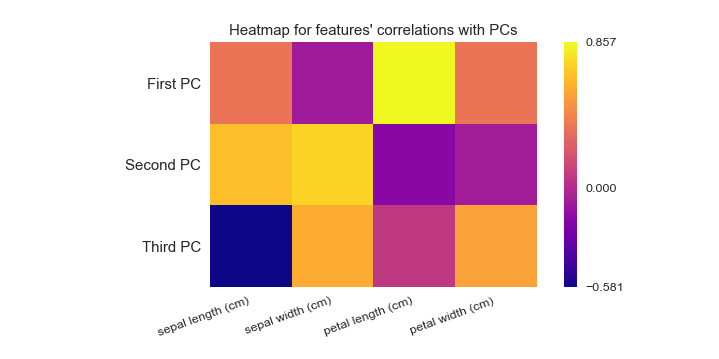

In [61]:
feature_names = list(iris.feature_names)
fig = plt.figure(figsize=(8, 4))
ax = fig.add_subplot(111)
plt.imshow(pca.components_, interpolation = 'none', cmap = 'plasma')
ax.grid(None)

ax.set_xticks(np.arange(0, len(feature_names)))
ax.set_yticks(np.arange(0, 3))
ax.set_yticklabels(['First PC', 'Second PC', 'Third PC'], fontsize=12)
ax.set_title("Heatmap for features' correlations with PCs")

ax.set_xticklabels(feature_names, rotation = 20, ha='right', fontsize = 10)
plt.colorbar( ticks=[pca.components_.min(), 0, pca.components_.max()])
#ax.set_xticklabels(feature_names, rotation = 60, ha='right', fontsize = 10)
#plt.colorbar(orientation='horizontal', ticks=[pca.components_.min(), 0, pca.components_.max()], pad=0.65);

plt.subplots_adjust(left= None, bottom = 0.2, right = None, top = None, wspace = None, hspace = None);

### Data pre-processing

#### Scikit learn bunch object into pandas data frame

In [3]:
print('Variable ''iris'' is of type ' + str(type(iris)))
columns = list(iris.feature_names ) + ['target']
iris_df = pd.DataFrame(np.concatenate((iris.data, np.array([iris.target]).T), axis=1), columns = columns)
iris_df.head()

Variable iris is of type <class 'sklearn.datasets.base.Bunch'>


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


#### Splitting data into train, and test tests

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

random_state = 3

# Full data
y = iris_df['target']
del iris_df['target']
X = iris_df
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = random_state)

#### Creating data sets

In [5]:
# Reduced dimension data (2 dimensions, first two principal components)
X_pca = PCA(n_components=2).fit_transform(X)
X_train_pca, X_test_pca,_,_ = train_test_split(X_pca, y, random_state = random_state)

# Reduced dimension data (2 dimensions, sepal width and length)
X_reduced = X.loc[:,['sepal length (cm)', 'sepal width (cm)']].values
X_train_reduced, X_test_reduced,_,_ = train_test_split(X_reduced, y, random_state = random_state)

# Target set where three classes ahve been reduced to binary case virginica vs. rest
y_train_bin = pd.DataFrame(y_train).copy()
y_test_bin = pd.DataFrame(y_test).copy()
combined = [y_train_bin, y_test_bin]
for dataset in combined:
    dataset[dataset['target'] != 2] = 0
    dataset[dataset['target'] == 2] = 1    
y_train_bin = y_train_bin['target']
y_test_bin = y_test_bin['target']

#display_side_by_side(pd.DataFrame(X_train).head(2), pd.DataFrame(X_train_pca).head(2), pd.DataFrame(X_train_reduced).head(2))


#### Feature scaling and normalization
See http://sebastianraschka.com/Articles/2014_about_feature_scaling.html

Heurestic: the only family of algorithms that are truly scale-invariant are three-based methods. Even in logistic regression feature scale might play a role if the optimization algorithm used is such that it converges more quickly with normalized data

Essentially two alternatives:
 - Z-score standardization
 - minmax-scaling

Which one to use? There's no obvious answer, it depends on the application. It seems that Z-score standardizations seems to be more common approach. 

##### Z-score standardization

In [7]:
from sklearn.preprocessing import StandardScaler

standardscaler = StandardScaler()
standardscaler.fit(X_train_pca)

X_train_pca_stand = standardscaler.transform(X_train_pca)
X_test_pca_stand = standardscaler.transform(X_test_pca)

display_side_by_side(pd.DataFrame(X_train_pca_stand).head(2), pd.DataFrame(X_train_pca).head(2))

,0,1
0,0.864648,-0.455779
1,0.435699,-1.150586
,0,1
0,1.802340,-0.216155
1,0.942362,-0.541822


In [ ]:
# Example: standardize only first n columns
#from sklearn.preprocessing import StandardScaler
#firstncols = 3
#
#X_train_stand = X_train.copy()
#X_test_stand = X_test.copy()
#
#standardscaler = StandardScaler()
#standardscaler.fit(X_train.iloc[:,0:firstncols])
#
#stand_train = standardscaler.transform(X_train.iloc[:,0:firstncols])
#stand_test = standardscaler.transform(X_test.iloc[:,0:firstncols])
#
#for i in range(firstncols):
#    X_train_stand.iloc[:,i] = stand_train[:,i]
#    X_test_stand.iloc[:,i] = stand_test[:,i]   


##### MinMax scaling

In [6]:
from sklearn.preprocessing import MinMaxScaler

minmaxscaler = MinMaxScaler()
minmaxscaler.fit(X_train_pca)

X_train_pca_mmscaled = minmaxscaler.transform(X_train_pca)
X_test_pca_mmscaled = minmaxscaler.transform(X_test_pca)

display_side_by_side(pd.DataFrame(X_train_pca_mmscaled).head(2), pd.DataFrame(X_train_pca).head(2))

,0,1
0,0.747649,0.397391
1,0.619761,0.273705
,0,1
0,1.802340,-0.216155
1,0.942362,-0.541822


### Models

#### Logistic regression

<IPython.core.display.Javascript object>


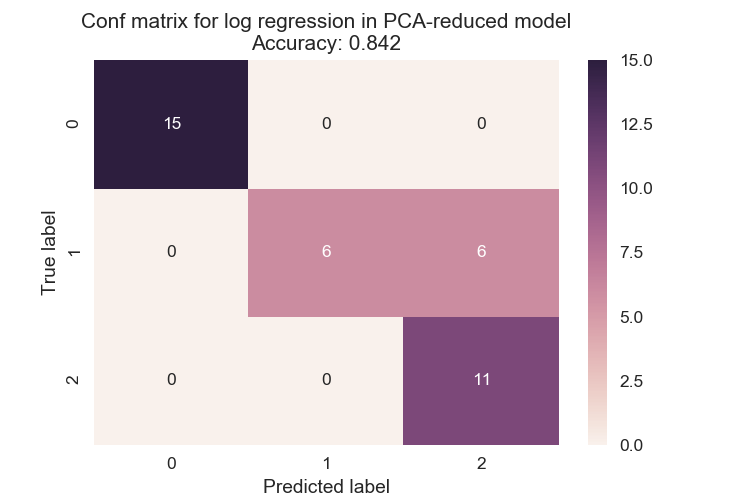

<IPython.core.display.Javascript object>


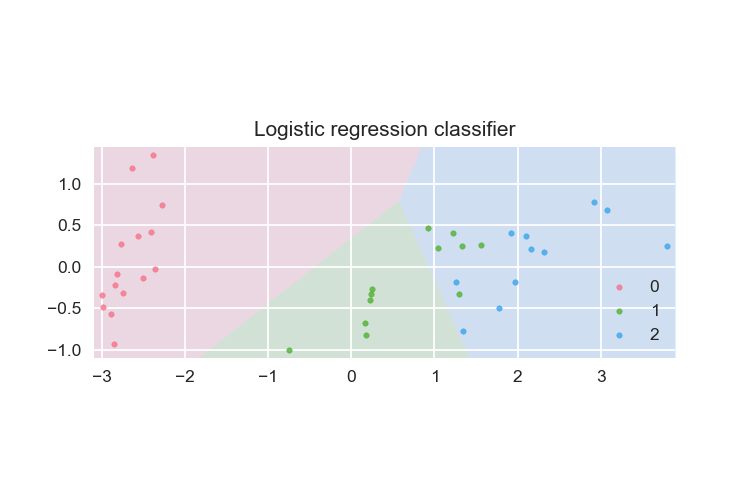

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

model_pca = LogisticRegression()
model_pca.fit(X_train_pca, y_train)
y_pred_pca = model_pca.predict(X_test_pca)

model_reduced = LogisticRegression()
model_reduced.fit(X_train_reduced, y_train)
y_pred_reduced = model_reduced.predict(X_test_reduced)

# Plot decision boundaries
plot_confusion_matrix(y_test,y_pred_pca, title = 'Conf matrix for log regression in PCA-reduced model')
title = 'Logistic regression classifier'
plot_decision_boundaries(X_test_pca, y_test, model_pca, title = title)

#### K-nearest neighbours

K-nearest neighbours needs feature scaling. Since it relies on some distance measure between features, we need make sure that features are on comparable scale. Here we will use PCA-reduced feature set and MinMax scaling.

<IPython.core.display.Javascript object>


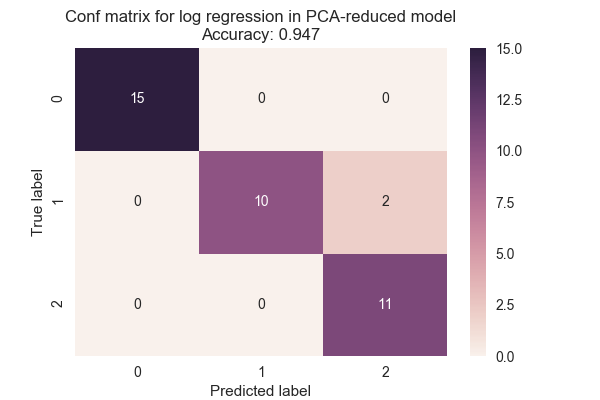

<IPython.core.display.Javascript object>


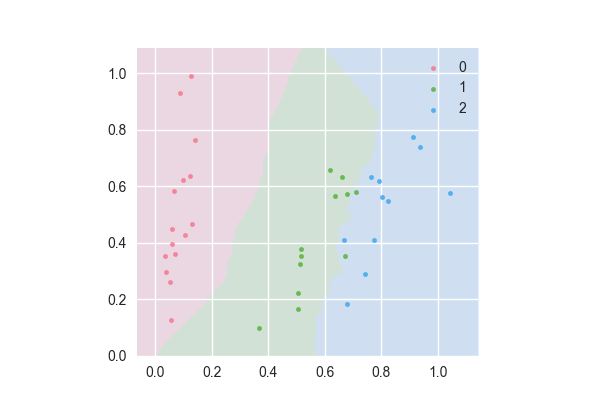

In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

n_neighbors = 3

model_pca = KNeighborsClassifier(n_neighbors = n_neighbors)
model_pca.fit(X_train_pca_mmscaled,y_train)
y_pred_pca = model_pca.predict(X_test_pca_mmscaled)

#print('PCA-readuced model accuracy is {:0.2f}'.format(accuracy_score(y_test, y_pred_pca)))
#print('Confusion matrix for PCA-reduced model')
#print(confusion_matrix(y_test.values, y_pred_pca))
#print('-'*50)

plot_confusion_matrix(y_test,y_pred_pca, title = 'Conf matrix for log regression in PCA-reduced model')
plot_decision_boundaries(X_test_pca_mmscaled, y_test, model_pca)

#### Decision tree
The neat thing about decision trees is that they don't require any feature scaling. We can directly deploy non-scaled data.

Petal length and width seem to be most important features

,Feature,Importance
3,petal width (cm),0.912910
2,petal length (cm),0.062510
1,sepal width (cm),0.017876
0,sepal length (cm),0.006703


<IPython.core.display.Javascript object>


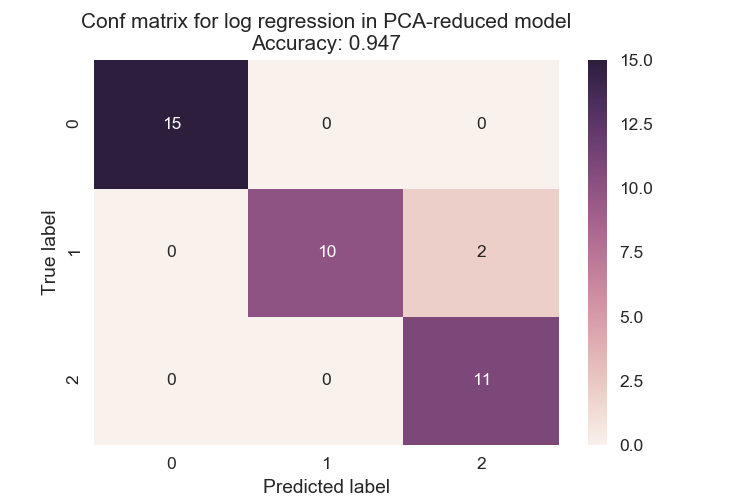

<IPython.core.display.Javascript object>


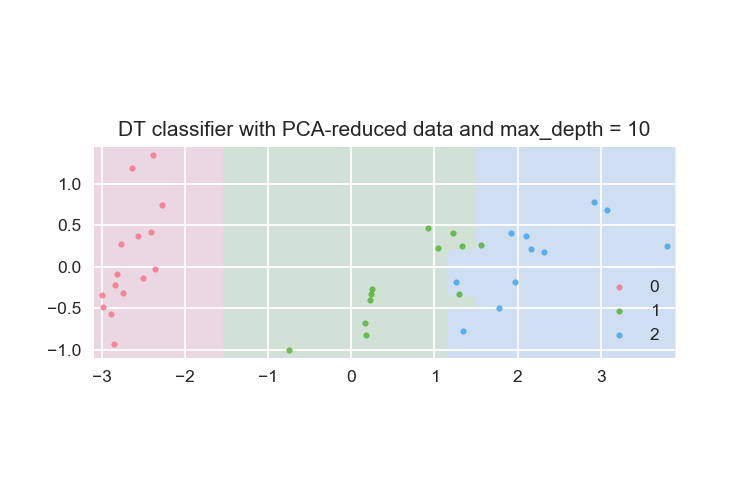

In [36]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score, confusion_matrix
import pydotplus
import io
from scipy import misc


def show_tree(decisionTree, file_path):
    dotfile = io.StringIO()
    tree.export_graphviz(decisionTree, out_file=dotfile)
    pydotplus.graph_from_dot_data(dotfile.getvalue()).write_png(file_path)
    i = misc.imread(file_path)
    plt.imshow(i)
    
max_depth = 10 # None by default

model = DecisionTreeClassifier(max_depth = max_depth, random_state = 0)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

model_pca = DecisionTreeClassifier(max_depth = max_depth)
model_pca.fit(X_train_pca,y_train)
y_pred_pca = model_pca.predict(X_test_pca)

# Most important features in full model
res = pd.DataFrame(list(zip(X_train.columns, model.feature_importances_)))
res.columns = ['Feature', 'Importance']
res = res.sort_values(['Importance'], ascending  = False)
display(res.head())

# Write full model tree into .dot file for visualization
# .dot file can be uploaded here http://www.webgraphviz.com/
dotfile = open('dtree.dot', 'w')
tree.export_graphviz(model, out_file = dotfile, feature_names = X_train.columns)
dotfile.close()

# cannot get graphviz to work...
#show_tree(model, 'test.png')

plot_confusion_matrix(y_test,y_pred_pca, title = 'Conf matrix for log regression in PCA-reduced model')
plot_decision_boundaries(X_test_pca, y_test, model_pca, 
                         title = 'DT classifier with PCA-reduced data and max_depth = {}'.format(max_depth))

#### Support vector classifier

<IPython.core.display.Javascript object>


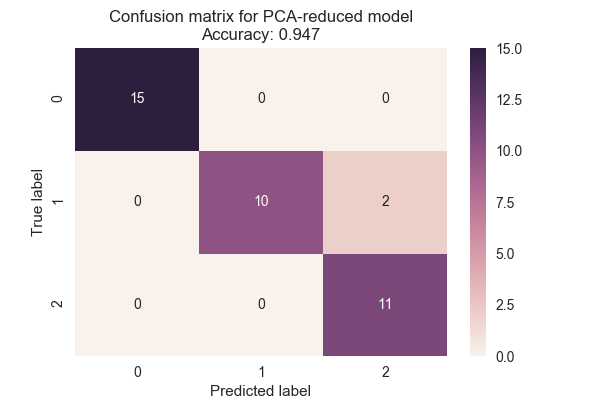

<IPython.core.display.Javascript object>


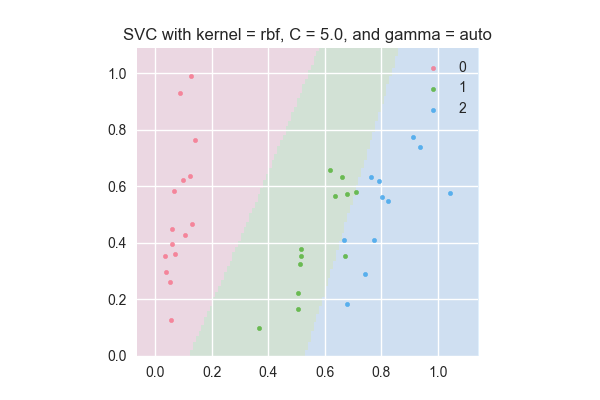

In [17]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix

C = 5.0
gamma = 'auto'
kernel = 'rbf'

model_pca = SVC(kernel = kernel, C = C, gamma = gamma, random_state = 0)
model_pca.fit(X_train_pca_mmscaled,y_train)
y_pred_pca = model_pca.predict(X_test_pca_mmscaled)

plot_confusion_matrix(y_test,y_pred_pca, title = 'Confusion matrix for PCA-reduced model')
plot_decision_boundaries(X_test_pca_mmscaled, y_test, model_pca, 
                         title = 'SVC with kernel = {}, C = {}, and gamma = {}'.format(kernel,C,gamma))


#### Naive Bayes Classifier

Called "naive" since they make the assumption that features are conditionally independent, given the class. That is, for all instances in a given class, the features have no correlation with each other.

Types:
 - Bernoulli: binary features
 - Multinomial: discrete features
 - Gaussian: continuous/real-valued features
 
Gaussian NB is usually used with high-dimensional data. Bernoulli and multinomial NBs are typically used for text classification where there are very large number of distinct words as features and feature vectors are sparse. NBs are easy understand and can work as baseline against more sophisticated models. Downsides include the strong assumption about conditional independency, which can lead to inferior generalization performance and inaccurate confidence estimates.

Bayes rule:
$$
\begin{align}
& \text{Posterior probability}  \ = \ \frac{\text{Prior probability}* \text{Likelihood}}{\text{Evidence}} \\[4pt]
\
\iff & Pr(y \ | \ X) = \frac{Pr(y) * Pr(X \ | \ y)}{Pr(X)}
\end{align}
$$

Bayes rule based classification model:

$$y^{*} = \underset{y}{\operatorname{argmax}} Pr(y \ | \ X) = \underset{y}{\operatorname{argmax}} Pr(y) \ Pr(X \ | \ y)$$

The "naive" assumption is that features $x_i$ are assumed to be independet of each other
$$y^{*} = \underset{y}{\operatorname{argmax}} Pr(y) \ Pr(X \ | \ y) = \underset{y}{\operatorname{argmax}} Pr(y) \ \prod_{i=1}^{n} Pr(x_i \ | \ y) $$

<IPython.core.display.Javascript object>


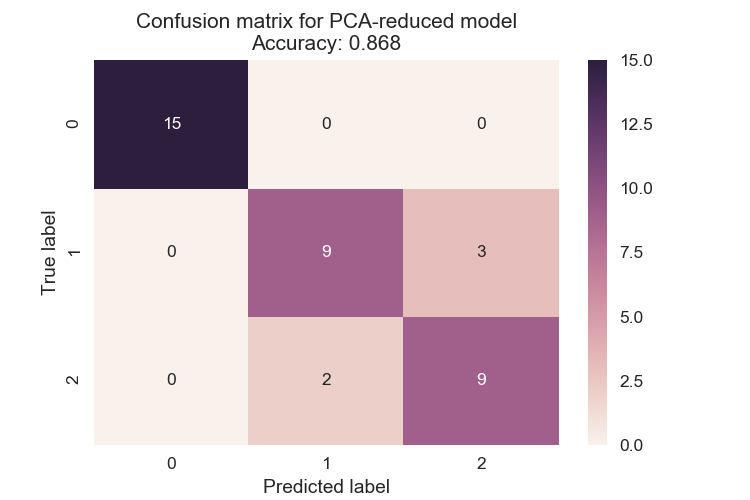

<IPython.core.display.Javascript object>


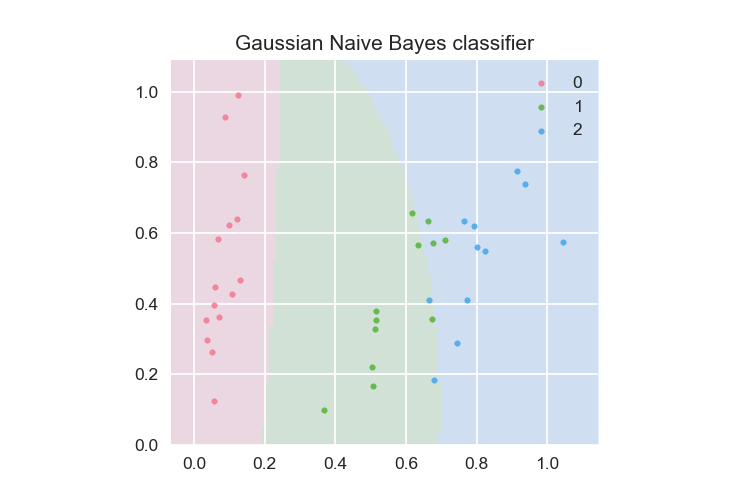

In [18]:
# We will use Gaussian Naive Bayes Classifier.
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix

model_pca = GaussianNB()
model_pca.fit(X_train_pca_mmscaled, y_train)
y_pred_pca = model_pca.predict(X_test_pca_mmscaled)

plot_confusion_matrix(y_test,y_pred_pca, title = 'Confusion matrix for PCA-reduced model')
plot_decision_boundaries(X_test_pca_mmscaled, y_test, model_pca, 
                         title = 'Gaussian Naive Bayes classifier')


#### Random forests
Essentially, an ensemble of tress instead of one decision tree, providing more stable and better generalizable results.

Original dataset $\rightarrow$ <i>n_estimator</i> randomized bootstrapped data sets of the same size as the original data set $\rightarrow$ randomized feature split, i.e. <i>n_estimator</i> trees $\rightarrow$ ensemble prediction

Same pros as decision trees, i.e. no need for careful feature scaling. In addition, might be more robust than single decision tree, easily parallelized across multiple CPUs. Cons: difficult for humans to interpret. However, it is noteworthy that aggregated/ensemble models are not universally better than their "single" counterparts, they are better if and only if the single models suffer of instability. For example here, on the PCA-reduced non-scaled feature data single decision tree performs better.

<IPython.core.display.Javascript object>


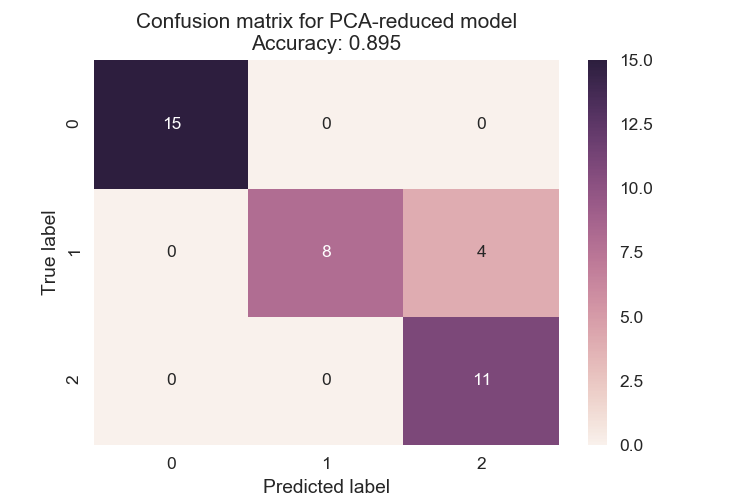

<IPython.core.display.Javascript object>


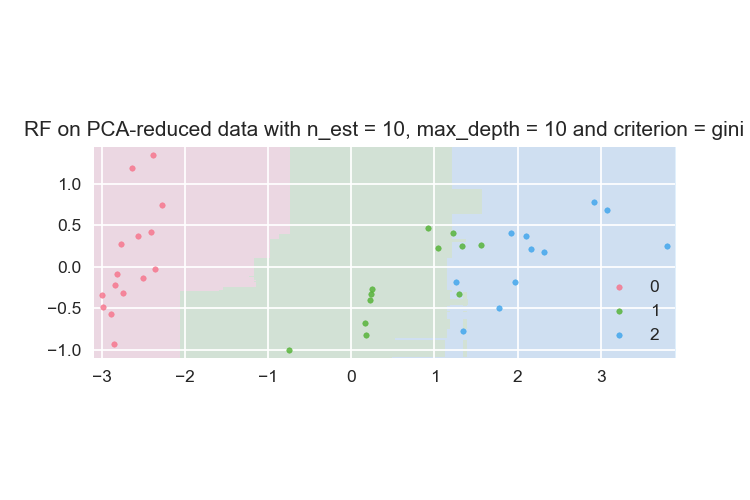

In [56]:
from sklearn.ensemble import RandomForestClassifier

n_estimators = 10 # default = 10
max_depth = 10 # Default = None
criterion = 'gini' # default = gini, gini/entropy

model_pca = RandomForestClassifier(n_estimators = n_estimators, criterion = criterion, random_state = 0)
model_pca.fit(X_train_pca, y_train)
y_pred_pca = model_pca.predict(X_test_pca)

plot_confusion_matrix(y_test,y_pred_pca, title = 'Confusion matrix for PCA-reduced model')
plot_decision_boundaries(X_test_pca, y_test, model_pca, 
                         title = 'RF on PCA-reduced data with n_est = {}, max_depth = {} and criterion = {}'.format(n_estimators, max_depth, criterion))


#### Gradient boosted decision trees

Similar to RF in being an ensemle method, in GBDTs ensembling is done as a series of trees rather than building many trees in parallel as in RFs. Each consecutive tree is trained as to correct the mistakes of the previous tree in the series. Typically, GBDTs use "weak learners" (in this case shallow trees) build in non-stochastic way, to create a model that makes fewer and fewer mistakes down the line.

Cons of GBDT include that it requires careful tuning of learning rate and other parameters. Further, like other tree models it is not well-suited for very high dimensional sparse features 

n_estimators and learning_rate are tuned togehter: n_estimators adjusted first to exploit memory and CPUs during training, then learning_rate. max_depth usually a small vlaue (e.g. 3-5)

<IPython.core.display.Javascript object>


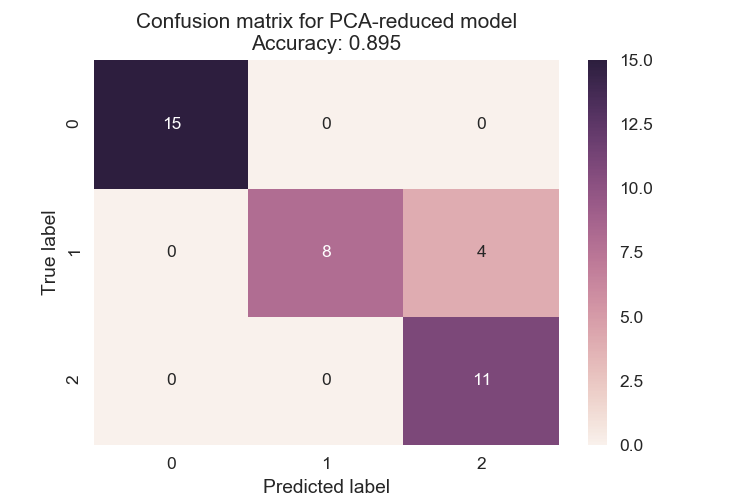

<IPython.core.display.Javascript object>


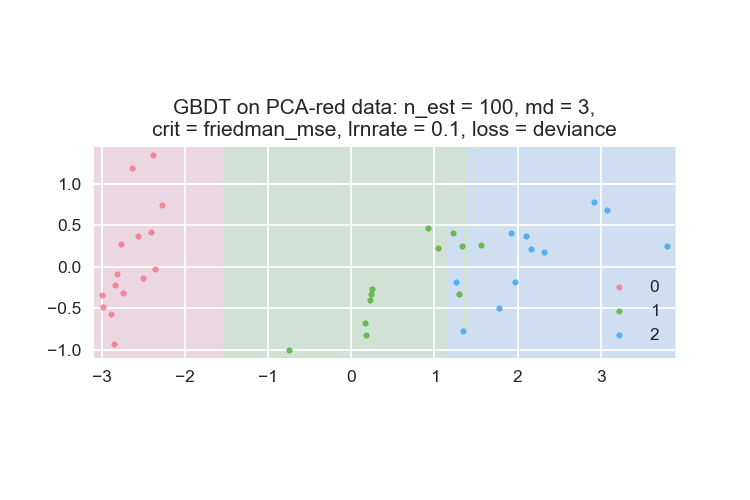

In [46]:
from sklearn.ensemble import GradientBoostingClassifier

n_estimators = 100 # default = 100
max_depth = 3 # default = 3
criterion = 'friedman_mse' # default = friedman_mse, mae
learning_rate = 0.1 # default = 0.1
loss = 'deviance' # default = deviance, exponential

model_pca = GradientBoostingClassifier(loss = loss, learning_rate = learning_rate, n_estimators = n_estimators, criterion = criterion, random_state = 0)
model_pca.fit(X_train_pca, y_train)
y_pred_pca = model_pca.predict(X_test_pca)

plot_confusion_matrix(y_test,y_pred_pca, title = 'Confusion matrix for PCA-reduced model')
plot_decision_boundaries(X_test_pca, y_test, model_pca, 
                         title = 'GBDT on PCA-red data: n_est = {}, md = {},\ncrit = {}, lrnrate = {}, loss = {}'
                         .format(n_estimators, max_depth, criterion, learning_rate, loss))


#### Simple neural network (MLP)

Multilayer perceptron (MLP)

<IPython.core.display.Javascript object>


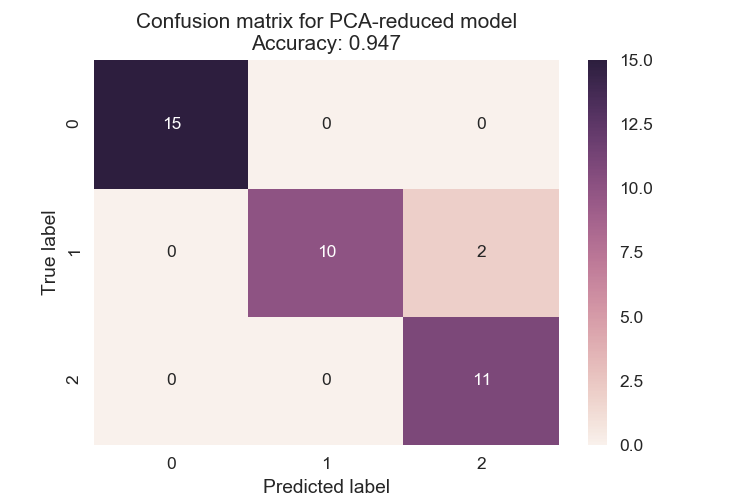

<IPython.core.display.Javascript object>


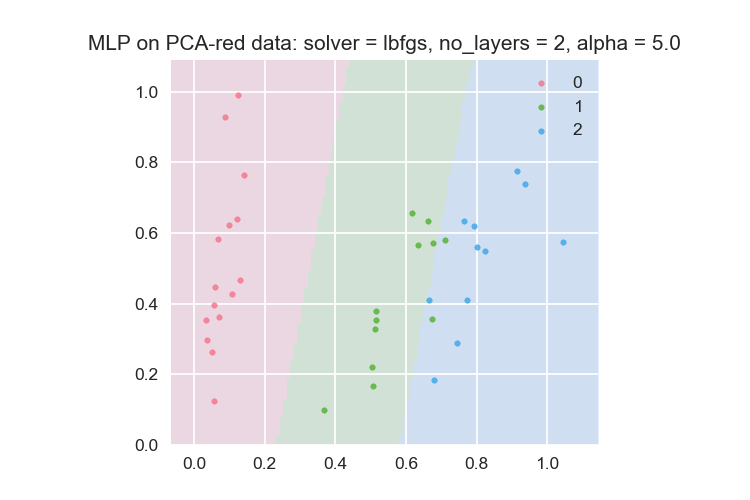

In [48]:
from sklearn.neural_network import MLPClassifier

solver ='lbfgs'
layers = [100, 100]
alpha = 5.0

model_pca = MLPClassifier(hidden_layer_sizes = layers, alpha = alpha, random_state = 0, solver = solver)
model_pca.fit(X_train_pca_mmscaled, y_train)
y_pred_pca = model_pca.predict(X_test_pca_mmscaled)

plot_confusion_matrix(y_test, y_pred_pca, title = 'Confusion matrix for PCA-reduced model')
plot_decision_boundaries(X_test_pca_mmscaled, y_test, model_pca, 
                         title = 'MLP on PCA-red data: solver = {}, no_layers = {}, alpha = {}'
                         .format(solver, len(layers), alpha))


### Model evaluation

In this section we learn about how to evaluate how good of a job out classifiaction model, or classifier, does. We also learn how to optimize the choice of classifier. Below is some general information about different evaluation metrics.


Scikit learn uses following confusion matrix build in binary classification:

\begin{bmatrix}
    TN & FP \\
    FN & TP
\end{bmatrix}

<b><i>Accuracy</i></b> (Acc) is defined as

\begin{equation}
Acc = \frac{TP + TN}{TN + TP + FN + FP}
\end{equation}


<b><i>Classification error</i></b> (CErr) is defined as

\begin{equation}
CErr = 1- Acc = \frac{FP + FN}{TN + TP + FN + FP}
\end{equation}

<b><i>Recall</i></b>, also known as TPR or sentivity, exhibits the probability of detection. It ranks higher if we not only have a high number of correct positive predictions (TPs) but also avoided missing true cases (avoided FNs). Example usage: crisis detection - it is very costly to miss a crisis. It is defined as

\begin{equation}
Recall = P(\hat{Y} = 1 \ | \ Y = 1) = \frac{TP}{TP + FN}
\end{equation}

<b><i>Precision</i></b> exhibits what fraction of positive predictions are correct. This ranks higher when it is important to avoid wronly predicting a true case (avoiding FPs) and less important to have all true cases (TPs) detected. In other words, when the classifier predicts a positive class we want to be very confident that the prediction is correct. Example usage: query suggestion in a web search - it is very costy to falsely flag for a hit as customer will remember these. It is defined as

\begin{equation}
Precision = P(Y = 1 \ | \ \hat{Y} = 1) = \frac{TP}{TP + FP}
\end{equation}


<b><i>FPR</i></b>, also know as specifity, exhibits what fraction of all negative cases does the classifier incorrectly identify as positive. This metric ranks better (lower in FPR value) if we avoid falsely predicting positive cases (avoid FPs) and also manage correcly picking out negative cases (TNs). It is defined as

\begin{equation}
FPR = P(\hat{Y} = 0 \ | \ Y = 0) = \frac{FP}{TN + FP}
\end{equation}


<b>There is often a tradeoff between precision and recall</b>. We can define a measure called <b>F-score</b> that lets us determine the tradeoff between these two:

\begin{equation}
F_{\beta} = (1 + \beta^2) \  \frac{Precision \cdot Recall}{\beta^2 \cdot Precision + Recall}
\end{equation}

To weight precision and recall equally: $\beta = 1$<br>
To weight precision over recall: $\beta < 1$<br>
To weight recall over precision: $\beta > 1$<br>

Reasons why classifier accuracy is close to null accuracy baseline from DummyClassifier:

<ul style="list-style-type:circle">
  <li>Ineffective, missing, or erroneous features</li>
  <li>Hyperparameters are poorly chose</li>
  <li>Class imbalance</li>  
</ul>

One should use three data splits when running classification (or regression for that matter).
 - Training set, which is used for model building
 - Validation set, which is used for model selection/hyperparameter tuning
 - Test set, used for final evaluation
 
In practice, one achieves this by doing the following:
 - Use train_test_split once for original data, to get the test set
 - Use train_test_split (or functions that do this automatically under the hood) again on the train data from previous step to split between training and validation sets

#### Select binary classifier to be used in this section
We will use a Support Vector Classifier.

<IPython.core.display.Javascript object>


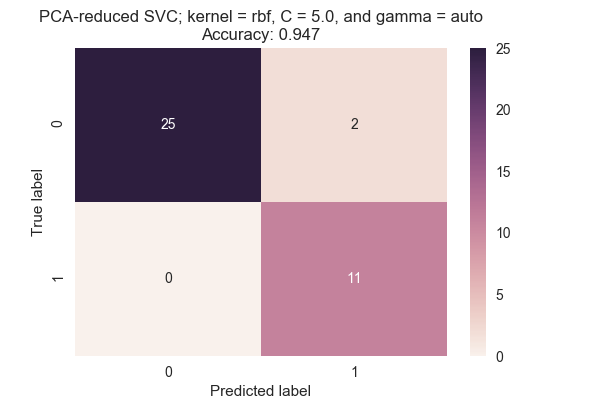

<IPython.core.display.Javascript object>


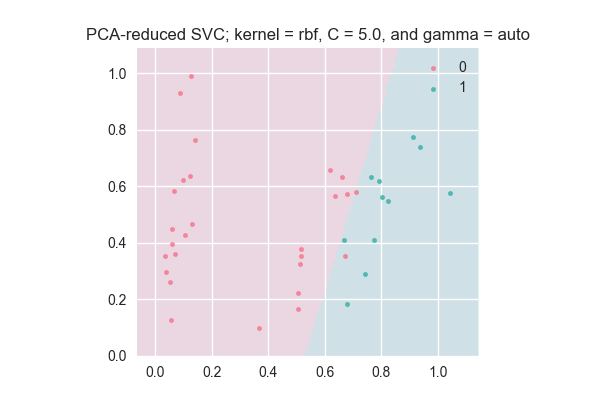

<IPython.core.display.Javascript object>


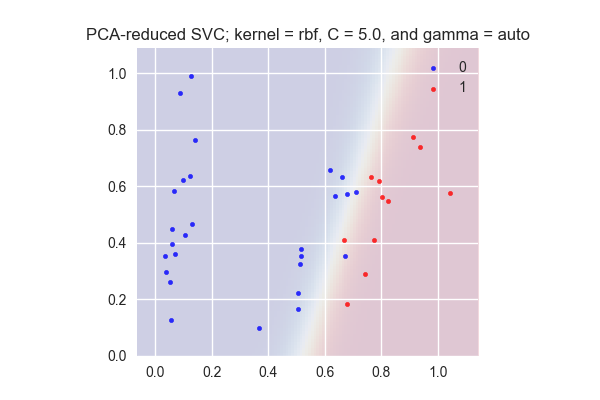

In [24]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix

C = 5.0
gamma = 'auto'
kernel = 'rbf'
probability = True # If True, slows down SVC

model = SVC(kernel = kernel, C = C, gamma = gamma, random_state = 0, probability = probability)
model_untrained = SVC(kernel = kernel, C = C, gamma = 'auto', random_state = 0, probability = probability)
model.fit(X_train_pca_mmscaled,y_train_bin)
y_pred = model.predict(X_test_pca_mmscaled)

title = 'PCA-reduced SVC; kernel = {}, C = {}, and gamma = {}'.format(kernel,C,gamma)
plot_confusion_matrix(y_test_bin ,y_pred, title = title)
plot_decision_boundaries(X_test_pca_mmscaled, y_test_bin, model, title = title)
plot_bin_decision_probs(X_test_pca_mmscaled, y_test_bin, model, title = title)


#### Evaluation curves

For infor about difference between precision-recall curve and ROC curve, see https://stats.stackexchange.com/questions/7207/roc-vs-precision-and-recall-curves

##### Precision-recall curve

<IPython.core.display.Javascript object>


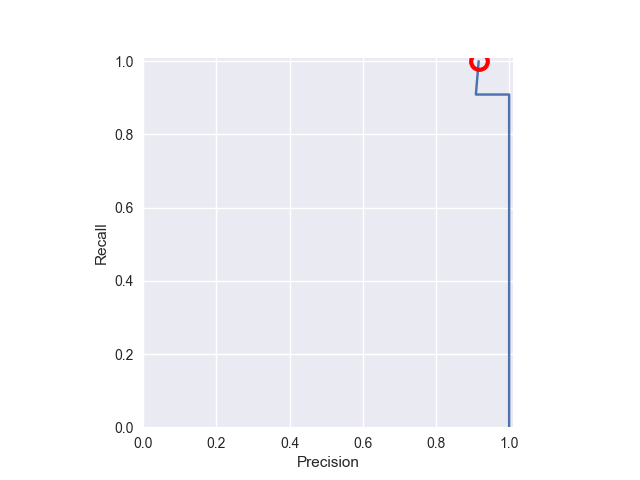

In [25]:
from sklearn.metrics import precision_recall_curve

y_clf_score = model.decision_function(X_test_pca_mmscaled)
precision, recall, thresholds = precision_recall_curve(y_test_bin, y_clf_score)

plot_bin_prcurve(precision, recall)    

##### ROC curve

In [3]:
plot_bin_ROC(y_test_bin, y_pred)     

NameError: name 'y_test_bin' is not defined

#### Dummy classifiers

It is worthwhile to compare our classifier's performance against a dummy classifier, especially if the sample is imbalanced.  

<IPython.core.display.Javascript object>


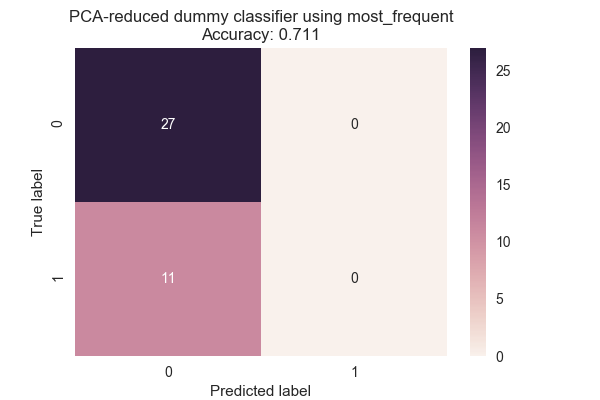

<IPython.core.display.Javascript object>


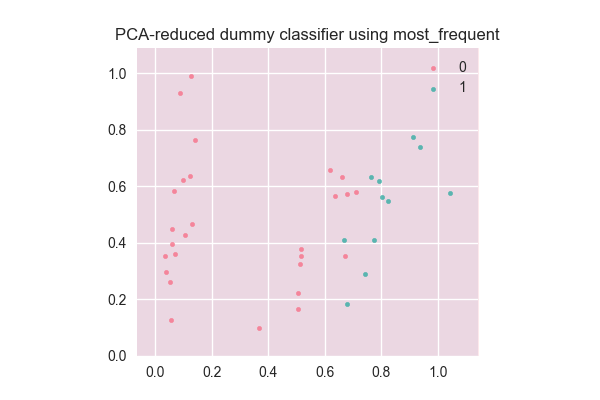

In [27]:
from sklearn.dummy import DummyClassifier

# most_frequent, stratified, uniform
strategy = 'most_frequent'

model_dummy = DummyClassifier(strategy = strategy)
model_dummy.fit(X_train_pca_mmscaled, y_train_bin)
y_pred_dummy = model_dummy.predict(X_test_pca_mmscaled)

title = 'PCA-reduced dummy classifier using {}'.format(strategy)
plot_confusion_matrix(y_test_bin ,y_pred_dummy, title = title)
plot_decision_boundaries(X_test_pca_mmscaled, y_test_bin, model_dummy, title = title)

#### Cross-validation

In [28]:
from sklearn.model_selection import cross_val_score

# accuracy, roc_auc, recall
scoring = 'accuracy'
folds = 5

print(cross_val_score(model_untrained, X_train_pca_mmscaled, y_train_bin, cv = folds, scoring = scoring))
print(cross_val_score(model_untrained, X_train_pca_mmscaled, y_train_bin, cv = folds, scoring = 'roc_auc'))
print(cross_val_score(model_untrained, X_train_pca_mmscaled, y_train_bin, cv = folds, scoring = 'recall'))


[ 0.91304348  1.          1.          1.          0.95238095]
[ 0.99166667  1.          1.          1.          1.        ]
[ 0.875       1.          1.          1.          0.85714286]


#### Hyperparameter tuning

##### Grid search

Gris search can be used in hyperparameter tuning. It is important to realize that optimal hyperparameter value might depend on according to which metric we are optimizing over. E.g. whether we are inclined more to recall or precision.

GridSearchCV can be performed on initial training data split, as it will automatically perform a cross-validation of n folds on the input set.

In [29]:
from sklearn.metrics.scorer import SCORERS
print(sorted(list(SCORERS.keys())))

['accuracy', 'adjusted_rand_score', 'average_precision', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'log_loss', 'mean_absolute_error', 'mean_squared_error', 'median_absolute_error', 'neg_log_loss', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_median_absolute_error', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'r2', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'roc_auc']


In [30]:
# Grid search for gamma parameter in SVC
# This could be extended to multiple hyperparameters at the same time
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, recall_score, precision_score, accuracy_score

grid_values = {'gamma': [0.001, 0.01, 0.05, 0.1, 1, 10, 100]}
scoring = 'accuracy' #accuracy, precision, recall, roc_auc
ave_method = 'binary' #‘binary’ (default), ‘micro’, ‘macro’, ‘samples’, ‘weighted’

grid_model = GridSearchCV(model_untrained, param_grid = grid_values, scoring = scoring)
grid_model.fit(X_train_pca_mmscaled, y_train_bin)
y_grid_scores = grid_model.decision_function(X_test_pca_mmscaled)
y_grid_pred = grid_model.predict(X_test_pca_mmscaled)

print('Grid search best parameter ({}): {}'.format(scoring,grid_model.best_params_) )
print('Grid search best score ({}): {}'.format(scoring, grid_model.best_score_))
print('-'*50)

print('Test set accuracy score: ', accuracy_score(y_test_bin, y_grid_pred))
print('Test set recall score: ', recall_score(y_test_bin, y_grid_pred, average = ave_method))
print('Test set precision score: ', precision_score(y_test_bin, y_grid_pred, average = ave_method))
print('Test set AUC score: ', roc_auc_score(y_test_bin, y_grid_scores))


Grid search best parameter (accuracy): {'gamma': 10}
Grid search best score (accuracy): 0.9732142857142857
--------------------------------------------------
Test set accuracy score:  0.947368421053
Test set recall score:  1.0
Test set precision score:  0.846153846154
Test set AUC score:  0.993265993266


##### Validation curve

http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.validation_curve.html
Compute scores for an estimator with different values of a specified parameter. This is similar to grid search with one parameter. However, this will also compute training scores and is merely a utility for plotting the results.

<IPython.core.display.Javascript object>


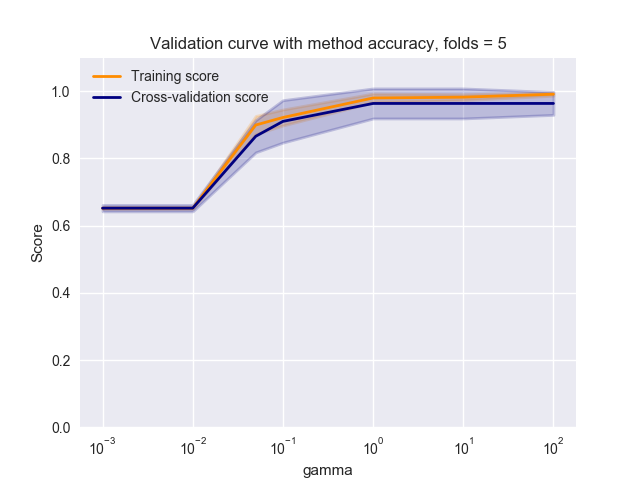

In [33]:
from sklearn.model_selection import validation_curve

param_name = 'gamma'
scoring = 'accuracy'
folds = 5
param_range = [0.001, 0.01, 0.05, 0.1, 1, 10, 100]
n_jobs = 1

train_scores, validation_scores = validation_curve( model_untrained
                                             ,X_train_pca_mmscaled
                                             ,y_train_bin
                                             ,param_name = param_name
                                             ,param_range = param_range
                                             ,cv = folds
                                             ,scoring = scoring
                                             ,n_jobs = n_jobs
                                            )

title = 'Validation curve with method {}, folds = {}'.format(scoring, folds)
plot_validation_curve(train_scores, validation_scores, param_range, param_name, scoring, title = title)

## Regression

### Linear regression

In [34]:
def lin_reg_plotter(coefs, X_train, X_test, y_test, poly_order, xlims, x_points = 20):
    from sklearn.preprocessing import PolynomialFeatures
    
    x_ax0 = np.linspace(xlims[0], xlims[1], x_points).reshape(x_points, 1)
    x_ax = PolynomialFeatures(poly_order).fit_transform(x_ax0)
    y_ax = np.sum(x_ax * coefs, axis = 1).reshape(x_points, 1)

    fig, ax = plt.subplots(nrows=1, ncols=1)
    ax.scatter(X_test, y_test,  color = 'orange', label = 'test')
    ax.scatter(X_train, y_train,  color = 'purple', label = 'train')        
    ax.plot(x_ax0, y_ax, color='teal', linewidth = 3, label = 'poly = ' + str(poly_order))
    ax.legend()

In [35]:
# inspiration from https://gist.github.com/brentp/5355925
# I would use stats rather than this...
def p_values(lin_reg_model, X, y):
        from scipy import stats
        sse = np.sum((lin_reg_model.predict(X) - y) ** 2, axis=0) / float(X.shape[0] - X.shape[1])        
        se = np.array([np.sqrt(np.diagonal(sse * np.linalg.inv(np.dot(X.T, X))))])
        t = lin_reg_model.coef_ / se
        p = 2 * (1 - stats.t.cdf(np.abs(t), y.shape[0] - X.shape[1]))
        return p, t

R-squared for linear regression with poly_order = 9 in train data is 1.00
R-squared for linear regression with poly_order = 9 in test data is -0.65
--------------------------------------------------
R-squared for lasso regression with poly_order = 9 in train data is 0.97
R-squared for lasso regression with poly_order = 9 in test data is 0.87
--------------------------------------------------
R-squared for ridge regression with poly_order = 9 in train data is 0.99
R-squared for ridge regression with poly_order = 9 in test data is 0.91


C:\Users\ville_000\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


<IPython.core.display.Javascript object>


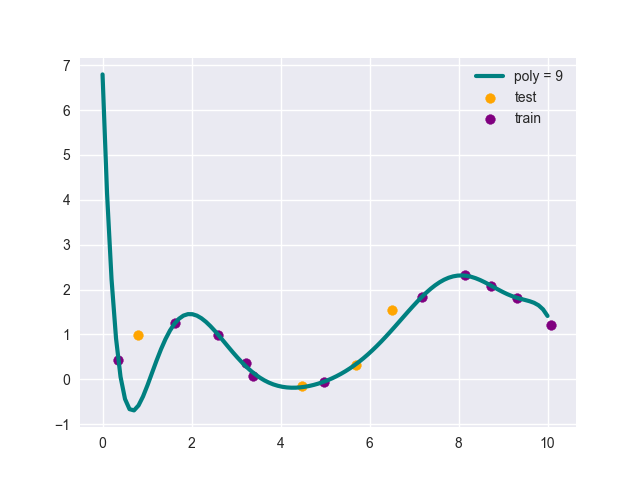

<IPython.core.display.Javascript object>


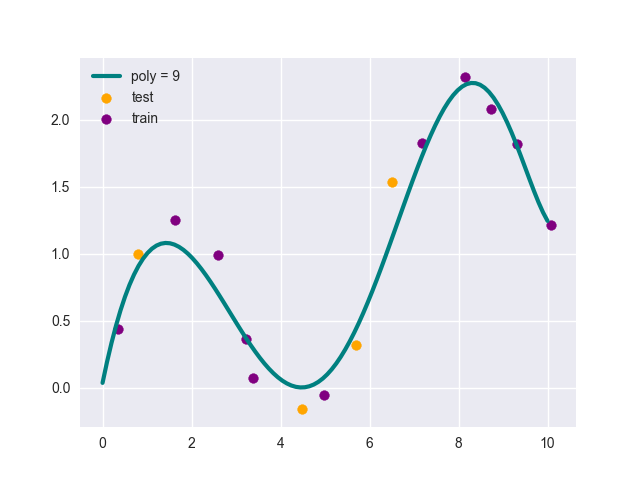

<IPython.core.display.Javascript object>


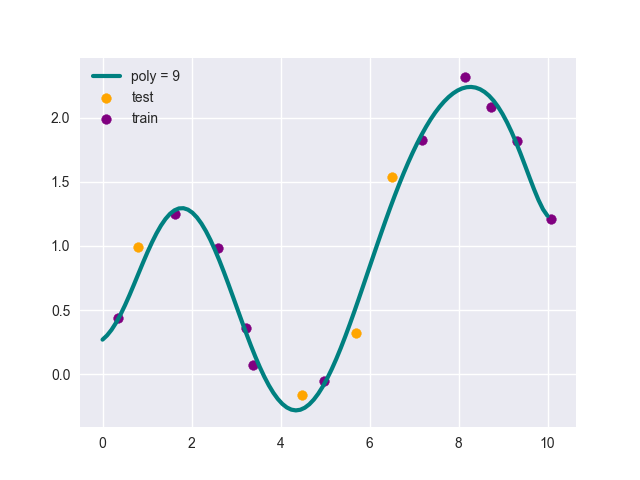

In [36]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Paramters
poly_order = 9
grid_points = 100

# Data
np.random.seed(0)
n = 15
x = np.linspace(0, 10, n) + np.random.randn(n)/5
y = np.sin(x) + x/6 + np.random.randn(n)/10

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state = 0)

# Create polynomial features into train/test data if poly_order > 1
X_train_pol = X_train.reshape(len(X_train),1)
X_test_pol = X_test.reshape(len(X_test),1)
polyfier = PolynomialFeatures(poly_order).fit(X_train_pol)
X_train_pol = polyfier.transform(X_train_pol)
X_test_pol = polyfier.transform(X_test_pol)

# Linear regression model
model_lin = LinearRegression(fit_intercept = False) # intercept included in features
model_lin.fit(X_train_pol, y_train)
y_pred_lin_test = model_lin.predict(X_test_pol)
y_pred_lin_train = model_lin.predict(X_train_pol)
print('R-squared for linear regression with poly_order = {} in train data is {:0.2f}'.format(poly_order, r2_score(y_train, y_pred_lin_train)))
print('R-squared for linear regression with poly_order = {} in test data is {:0.2f}'.format(poly_order, r2_score(y_test, y_pred_lin_test)))
print('-'*50)

# Lasso regression model
model_lasso = Lasso(alpha = 0.01, max_iter = 50000, fit_intercept = False) # intercept included in features
model_lasso.fit(X_train_pol, y_train)
y_pred_lasso_test = model_lasso.predict(X_test_pol)
y_pred_lasso_train = model_lasso.predict(X_train_pol)
print('R-squared for lasso regression with poly_order = {} in train data is {:0.2f}'.format(poly_order, r2_score(y_train, y_pred_lasso_train)))
print('R-squared for lasso regression with poly_order = {} in test data is {:0.2f}'.format(poly_order, r2_score(y_test, y_pred_lasso_test)))
print('-'*50)

# Ridge regression model
model_ridge = Ridge(alpha = 0.01, max_iter = 50000, fit_intercept = False) # intercept included in features
model_ridge.fit(X_train_pol, y_train)
y_pred_ridge_test = model_ridge.predict(X_test_pol)
y_pred_ridge_train = model_ridge.predict(X_train_pol)
print('R-squared for ridge regression with poly_order = {} in train data is {:0.2f}'.format(poly_order, r2_score(y_train, y_pred_ridge_train)))
print('R-squared for ridge regression with poly_order = {} in test data is {:0.2f}'.format(poly_order, r2_score(y_test, y_pred_ridge_test)))

#p_vals, _ = p_values(model, X_train_pol, y_train)
#print('p-values are:' )
#np.set_printoptions(precision = 3)
#print(p_vals)

lin_reg_plotter(model_lin.coef_, X_train, X_test, y_test, poly_order, [0,10], x_points = 100)
lin_reg_plotter(model_lasso.coef_, X_train, X_test, y_test, poly_order, [0,10], x_points = 100)
lin_reg_plotter(model_ridge.coef_, X_train, X_test, y_test, poly_order, [0,10], x_points = 100)

## Stuff to add


Pipelines<br>
Linear SVMs<br>
Kernelized SVMs<br>


Treating imbalanced datasets in classification<br>

Different classification scoring metrics in action: classification_report. This especially for multi-class case, not just binary<br>
Micro and macro averages in multi-class classification<br>

Unsupervised learning: k-means clustering, manifold learning, agglomerative clustering, t-sne, dbscan 
